We explore Cherenkov Radiation for this project. Cherenkov Radiation results from a charged particle that moves with a speed greater than the speed of light **through that particular medium**. i.e.

$v_{par} > \frac{c}{n}$

In astrophysics, this is why the precise direction of the radiation gives us energy measurements! The radiation is a rapid energy-loss mechanism of the charged particle.

We will simulate spectra for Cherenkov radiation under different parameters.

We will assume the Frank-Tamm formula for the frequency spectrum resulting from a charged particle moving relativistically along the $x$ axis in a medium with refraction index $n$. For material on the derivation of this formula see Jackson (EM book) and many online resources. 

Frequency spectrum:

$\frac{dE}{dx} = \frac{q^2 \mu}{4\pi}(1-\frac{1}{\beta^2n^2}) \nu d\nu$

Let's get this in the form of $\nu F_{\nu}$ form. 

We have $\frac{dE}{dx}$ but we want $\nu F_{\nu}$. We note that $dx = \frac{c}{n} dt$ therefore

$\frac{dE}{dx} = \frac{n}{c} \frac{dE}{dt}$

Which is power. $P = \frac{dE}{dt}$

Next we note $P = \frac{4\pi L_\nu}{V}$ where $L_\nu$ is the luminosity at a given $\nu$ and $V$ is the volume. We also note that $L_\nu = F_\nu A$ where $A$ is the area.

Therefore,

$P = \frac{dE}{dt} = \frac{ 4\pi F_\nu A}{V}$

$V=AL$

$P = \frac{dE}{dt} = \frac{ 4\pi F_\nu}{L}$

Where $L$ is the distance travelled by the moving charged particle. This would be an input parameter.

Moving things around, we see that $F_\nu$ becomes

$F_\nu = \frac{c L}{4\pi n} \bigg[\frac{q^2 \mu}{4\pi}(1-\frac{1}{\beta^2n^2}) \nu d\nu \bigg]$

To get the form we are looking for, we multiply a fancy one to the right hand side, i.e. $\frac{\nu}{\nu}$:
    
$F_\nu = \frac{q^2 c \mu \ln(10)}{(4\pi )^2 n} (1-\frac{1}{\beta^2n^2}) L \nu^2 d(\log(\nu))$

And finally, multiply by one more $\nu$:
    
$\nu F_\nu = A(n) (1-\frac{1}{\beta^2n^2}) L \nu^3 d(\log(\nu))$

with $A(n) = \frac{q^2 c \mu \ln(10)}{(4\pi)^2 n}$. A is a function of n because $\mu$ is the magnetic permeability and depends on the material of which we propagate through. But since we are interested in only interactions in water, we will simplify quite a bit in a moment.

So we see $A(n)$ is just a constant in our simple model because $n=1.333$ in water, therefore $\mu$ is a determined, unchanging quantity ($\mu = 1.25\times10^{-6} H/m$) and the rest are fundamental constants. So we note that $A(n=1.33) = A = 1.05248\times10^{-37} \frac{C^2H}{m}$

Now our equation looks like:
    
$\nu F_\nu = A (1-\frac{1}{\beta^2 n^2}) L \nu^3 d(\log(\nu))$

where $A$ is known, $\beta$ and $L$ are input parameters, and we plot against some frequency range $[\nu, \nu+d\nu]$

Now let's plot for varying $\beta$s and $L$s and $n$s. 

Import necessary packages.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pylab
import numpy as np
import math
import scipy.integrate as integrate
from scipy.integrate import quad

Define the velocity.  Remember that $\beta = v/c < 1$ but also $\beta > 1/n (=0.7518)$ for Cherenkov radiation to occur.

In [2]:
beta = 0.77777
assert(beta > 0.7518)

Now define some other variables ($L$ = the length scale--to convert to MKS, $q$ = the fundamental charge, 
                                 $n$ = the index of refraction, $c$ = the speed of light in vacuum in m/s,
                                 and $\mu$, which is pretty much constant in most materials).

In [3]:
L = 1e-3
q = 1.6e-19 #fundamental charge.
n = 1.333
c = 3e8 # m/s
mu = 1.25e-6 #mu which is pretty much constant in most material.
A = q**2*c*mu*np.log(10)/(n*(4*np.pi)**2) #in C^2*H/m.

Now create logarithmically spaced frequencies in Hz from 100 MeV up to 2 TeV.

In [4]:
v = np.logspace(22, 26, num=10, base=10) #in Hz, from 100MeV and goes up to 2TeV.

Integrate with these values to find $\nu F_\nu$ $y$ points over varying frequency bins.

In [5]:
def integrand(v, beta): 
    return A*L*(1 - 1/(beta**(2)*(n)**2))*(v**(3))

#Integrate over the varying frequency bins for several data points (stored in v).
ans, err = quad(integrand, np.log10(2.41e22), np.log10(5.0e23), args=(beta,))

Plot the data and the spectral distribution.  Include the trend line.

y=69005254452.072235x+(-309907319681163064634987826145918976.000000)


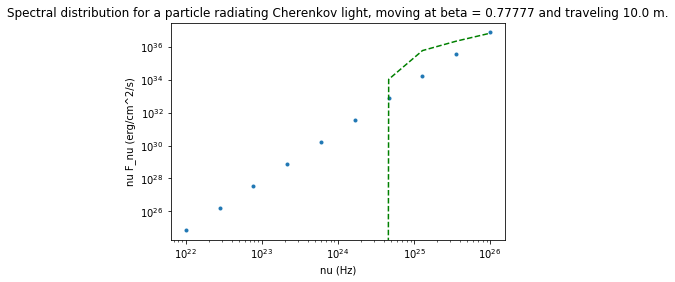

In [6]:
x = v
y = integrand(v,beta)
plt.scatter([x],[y], marker = ".", label = "Cherenkov light for beta=0.7777, L=100 m")
plt.xscale('log')
plt.yscale('log')
plt.ylabel('nu F_nu (erg/cm^2/s)')
plt.xlabel('nu (Hz)')
plt.title('Spectral distribution for a particle radiating Cherenkov light, moving at beta = ' + str(beta) + ' and traveling 10.0 m.')
#import pylab
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pylab.plot(x,p(x),"g--")
print("y=%.6fx+(%.6f)"%(z[0],z[1]))

What's happening lol? 

Now let's focus on making a movie of Cherenkov light from a moving charged particle.

Import packages:

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

Set up the figure and axes. Line, particle, and circle are the elements we want to animate.  Store the circle artist elements in a dictionary to be able to remove them for each frame.

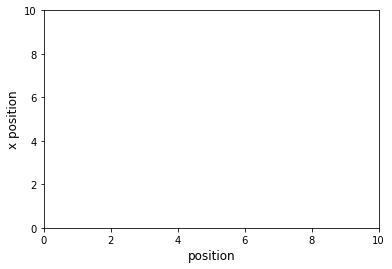

In [8]:
fig, ax = plt.subplots()

ax.set_xlim((0, 10))
ax.set_ylim((0, 10))

plt.xlabel('position', fontsize=12)
plt.ylabel('x position', fontsize=12)
line, = ax.plot([], [], lw=1)
particle, = ax.plot([], [], marker='o', ms=4, color='blue')
circ = {}

Set the number of frames for the movie and the number of pulses.

In [9]:
Nframes = 100
Np = 6

Define intial function. 

In [10]:
def init():
    particle.set_data([], [])
    line.set_data([],[])
    return particle, line,

Now define the velocity of the particle $\beta = v/c$ and the index of refraction $n$. There will be Cherenkov radiation when $v = c\beta > c / n$ or $\beta > 1 / n$.

In [11]:
beta = 0.9
n = 1.333
cs = 1. / n

Insert the motion of Cherenkov light. 

In [12]:
def updatefig(i):
    t_total = 4. * np.pi
    t = t_total * float(i/(Nframes-1.))
    x = beta*t
    y = 5

    tp = []
    for n in range(Np):
        tp.append(n * t_total / (Np - 1))
    for tt in tp:
        if tt in circ:
            circ[tt].remove()
        circ[tt] = plt.Circle((beta * tt, y), radius=cs*(t-tt)*np.heaviside(t - tt, 0), facecolor="None", edgecolor='k')
        ax.add_artist(circ[tt])

    line.set_data([0,10],[5])
    particle.set_data(x,y)
    ax.set_aspect('equal')
    return particle, line,

In [13]:
anim = animation.FuncAnimation(fig, updatefig, init_func=init,
                               frames=Nframes, interval=20, 
                               blit=True)

So right now, really cool things are happening. But it's not cherenkov light. On Monday, December 9, I spent some more time trying to get these dang circles to expand from the particle radially in four locations. I have failed :( but I know the code is close, no matter how deceiving the sad little video is. It has something to do with the way I define each origin for each expanding circle. Can't quite wrap my mind around it but stay tuned! 

In [14]:
HTML(anim.to_jshtml())